In [75]:
import pandas as pd

In [76]:
train_data = pd.read_csv('data/asl_data/sign_mnist_train.csv')
valid_data = pd.read_csv('data/asl_data/sign_mnist_valid.csv')

In [77]:
train_data.head()
X_train = train_data.drop(['label'],axis=1).values
y_train = train_data['label'].values
X_valid = valid_data.drop(['label'],axis=1).values
y_valid = valid_data['label'].values

In [78]:
y_train[0]

3

In [79]:
X_train[0]

array([107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
       165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
       170, 169, 111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160,
       163, 164, 170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172,
       172, 171, 171, 170, 113, 123, 131, 137, 142, 145, 150, 152, 155,
       158, 161, 163, 164, 172, 105, 142, 170, 171, 171, 171, 172, 172,
       173, 173, 172, 171, 171, 171, 116, 125, 133, 139, 143, 146, 151,
       153, 156, 159, 162, 163, 167, 167,  95, 144, 171, 172, 172, 172,
       172, 172, 173, 173, 173, 172, 172, 171, 117, 126, 134, 140, 145,
       149, 153, 156, 158, 161, 163, 164, 175, 156,  87, 154, 172, 173,
       173, 173, 173, 173, 174, 174, 174, 173, 172, 172, 119, 128, 136,
       142, 146, 150, 153, 156, 159, 163, 165, 164, 184, 148,  89, 164,
       172, 174, 174, 174, 174, 175, 175, 174, 175, 174, 173, 173, 122,
       130, 138, 143, 147, 150, 154, 158, 162, 165, 166, 172, 18

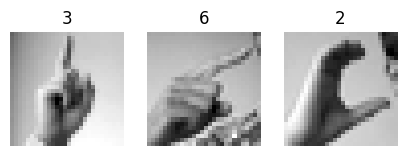

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(y_train[i])
    plt.axis('off')
    plt.imshow(X_train[i].reshape(28,28),cmap='gray')

In [81]:
#Normalize the data
X_train = X_train/X_train.max()
X_valid = X_valid/X_valid.max()

In [82]:
X_train.max()

1.0

In [83]:
#Categorize 
from tensorflow import keras
number_of_categories = 24
y_train = keras.utils.to_categorical(y_train , number_of_categories)
y_valid = keras.utils.to_categorical(y_valid , number_of_categories)

In [84]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [85]:
#Model Training
from keras.models import Sequential
from keras.layers import Dense

In [86]:
X_train.shape

(27455, 784)

In [87]:
model = Sequential()
model.add(Dense(units=800,activation = 'relu',input_shape = (784,)))
model.add(Dense(units=800,activation = 'relu'))
model.add(Dense(units=800,activation = 'relu'))
model.add(Dense(units=24 , activation = 'softmax'))

          

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 80)                62800     
                                                                 
 dense_9 (Dense)             (None, 80)                6480      
                                                                 
 dense_10 (Dense)            (None, 80)                6480      
                                                                 
 dense_11 (Dense)            (None, 24)                1944      
                                                                 
Total params: 77,704
Trainable params: 77,704
Non-trainable params: 0
_________________________________________________________________


Calculated using (784+1) * 800 + (801 * 800) + (801 * 800) +(801 * 24)

In [89]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [90]:
model.fit(X_train,y_train,epochs = 10 , validation_data = (X_valid,y_valid))

Epoch 1/10
858/858 [==============================] - 3s 3ms/step - loss: 2.2364 - accuracy: 0.2882 - val_loss: 2.0334 - val_accuracy: 0.3456
Epoch 2/10
858/858 [==============================] - 2s 3ms/step - loss: 1.3814 - accuracy: 0.5338 - val_loss: 1.2545 - val_accuracy: 0.5765
Epoch 3/10
858/858 [==============================] - 3s 3ms/step - loss: 0.9663 - accuracy: 0.6669 - val_loss: 1.1093 - val_accuracy: 0.6308
Epoch 4/10
858/858 [==============================] - 3s 4ms/step - loss: 0.7013 - accuracy: 0.7561 - val_loss: 1.1065 - val_accuracy: 0.6626
Epoch 5/10
858/858 [==============================] - 3s 3ms/step - loss: 0.5224 - accuracy: 0.8199 - val_loss: 1.0198 - val_accuracy: 0.7002
Epoch 6/10
858/858 [==============================] - 3s 3ms/step - loss: 0.4027 - accuracy: 0.8631 - val_loss: 0.9410 - val_accuracy: 0.7467
Epoch 7/10
858/858 [==============================] - 3s 3ms/step - loss: 0.3161 - accuracy: 0.8968 - val_loss: 1.4280 - val_accuracy: 0.6456
Epoch 

This is